# 1.TSP
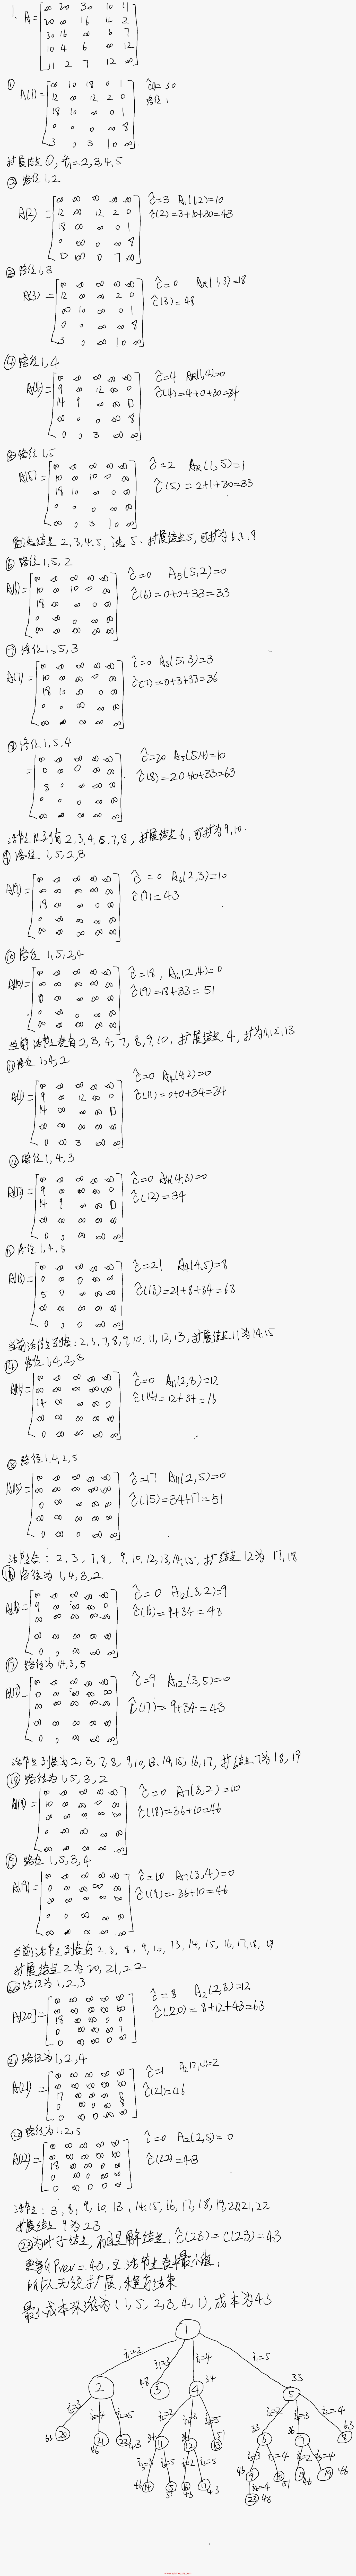

# 2.0/1背包问题

In [1]:
class Node(object):
    def __init__(self,par,lev,t,cap,cv,ub):
        self.parent=par;
        self.level=lev;#当前节点的级
        self.tag=t#左1，右0
        self.CC=cap#当前剩余容量
        self.CV=cv#当前价值
        self.CUB=ub#可能达到的物品价值上界估计
        
        
    def print(self):
        return "Node:(level=%d,tag=%d,CC=%d,CV=%d,CUB=%d)"%(self.level,self.tag,self.CC,self.CV,self.CUB)
        


In [2]:
def Finish(ANS,N):
    
    s=""
    for j in range(N,0,-1):
        if(ANS.tag==1):
            s=s+str(j)+" "
        ANS=ANS.parent
        if(ANS==-1):
            break

    print("result:"+s)

In [3]:
def LUBound(P,W,cap,cv,N,k,Pv1,Pvu):#求最大收益的上下界
#     k为当前节点的级level-1
# cap背包当前剩余容量，
# cv背包当前价值总量
# 还有level->N要考虑
    rw=cap#随时记录剩余总量
    Pvl=cv
    for i in range(k,N):
        if(rw<W[i]):#至少有一件商品无法放入的情况下
#             print(i)
            Pvu=Pvl+rw*P[i]/W[i]#（放不进去了，但按比例塞一下的话还可以）
            for j in range(i+1,N):
                if(rw>=W[j]):
                    rw=rw-W[j]
                    Pvl=Pvl+P[j]
#             print(i,rw,Pvl,Pvu)
            return Pvl,Pvu
        #都能放进去的情况下
        rw=rw-W[i]
        Pvl=Pvl+P[i]    
    Pvu=Pvl
#     print(rw,Pvl)
    return Pvl,Pvu


In [4]:
def LOCKNAP(P,W,M,N):#物品序号
#     #满足：P[i]/W[i]>=P[i+1]/W[i+1]
#     M背包容量，Pvl价值估计下界,Pvu上界（放不进去了，但按比例塞一下的话还可以）,cap,cv包内价值,prev到目前所知道的最佳目标值
# P价值，W重量
# ANS，X,N物品数目
# 初始化init
#     GetNode(E);#生成根节点
    Live=[]#活节点表
    Tree=[]
    root=Node(-1,0,1,M,0,0)    
    Pv1=0
    Pvu=0
    Pvl,Pvu=LUBound(P,W,root.CC,root.CV,N,root.level,Pv1,Pvu)
    prev=Pvl
    root.CUB=Pvu
    root.tag=0
    Tree.append(root)
    print("root",root.print())
    E=root
    ANS=root
    while(True):
        i=E.level+1
        cap=E.CC
        cv=E.CV
#         print(i)
        if(i>N):
            if(cv>prev):
                prev=cv
                ANS=E
        else:#E是内部节点
            if(cap>=W[i-1]):#左儿子可行
                left=Node(E,i,1,cap-W[i-1],cv+P[i-1],E.CUB)
                print("left:",left.print())
                Live.append(left)
                Tree.append(left)
#             print(left.print())
            Pvl,Pvu=LUBound(P,W,cap,cv,N,i,Pv1,Pvu)
            if(Pvu>=prev):#右儿子会活
                right=Node(E,i,0,cap,cv,Pvu)
                print("right:",right.print())
                Live.append(right)
                Tree.append(right)
                prev=max(prev,Pvl-0.1)
        z=0
        while(len(Live)>0):
#             print(z,len(Live))
            if(Live[z].CUB<prev):
                Live.remove(Live[z])
                z-=1
            z+=1
            if(z==len(Live)):
                break
        if(len(Live)==0):
            break
        
        E=max(Live,key=lambda x:x.CUB)        
        Live.remove(E) 
        print("E:",E.print())
        if(E.CUB<=prev):
            break
    Finish(ANS,N)


In [5]:
P=[10,10,12,18,10,10,12,18,10,10,12,18,10,10,12,18]
W=[2,4,6,9,2,4,6,4,2,4,6,6,2,4,6,9,2,4,6,9]
M=60
N=16
LOCKNAP(P,W,M,N)

root Node:(level=0,tag=0,CC=60,CV=0,CUB=167)
left: Node:(level=1,tag=1,CC=58,CV=10,CUB=167)
right: Node:(level=1,tag=0,CC=60,CV=0,CUB=162)
E: Node:(level=1,tag=1,CC=58,CV=10,CUB=167)
left: Node:(level=2,tag=1,CC=54,CV=20,CUB=167)
right: Node:(level=2,tag=0,CC=58,CV=10,CUB=166)
E: Node:(level=2,tag=1,CC=54,CV=20,CUB=167)
left: Node:(level=3,tag=1,CC=48,CV=32,CUB=167)
right: Node:(level=3,tag=0,CC=54,CV=20,CUB=168)
E: Node:(level=3,tag=0,CC=54,CV=20,CUB=168)
left: Node:(level=4,tag=1,CC=45,CV=38,CUB=168)
right: Node:(level=4,tag=0,CC=54,CV=20,CUB=168)
E: Node:(level=4,tag=1,CC=45,CV=38,CUB=168)
left: Node:(level=5,tag=1,CC=43,CV=48,CUB=168)
right: Node:(level=5,tag=0,CC=45,CV=38,CUB=162)
E: Node:(level=4,tag=0,CC=54,CV=20,CUB=168)
left: Node:(level=5,tag=1,CC=52,CV=30,CUB=168)
right: Node:(level=5,tag=0,CC=54,CV=20,CUB=160)
E: Node:(level=5,tag=1,CC=43,CV=48,CUB=168)
left: Node:(level=6,tag=1,CC=39,CV=58,CUB=168)
right: Node:(level=6,tag=0,CC=43,CV=48,CUB=166)
E: Node:(level=5,tag=1,CC=5

# 3.最佳调度问题
将n个任务按照所需时间非递减排序，得到任务序列1,2,3,4，……，n,满足时间关系t[1]<t[2]<……<t[n].  

<b>限界函数：</b>将n个任务中前k个任务分配给当前k个机器，然后将k+1个任务分配给最早完成已分配任务的机器，依次进行，最后找到这些机器最终分配任务所需要的时间最长，将时间作为分支限界函数。如果一个扩展节点所需要的额时间超出此值，则删除此节点及其子数，否则更新最优值

<b>优先级：</b>哪台机器完成当前任务的时间越早，也就是所有机器中最终停机时间越早，优先级就越高。